# Interacting With Data

In [1]:
from IPython.display import display, Image, HTML
from talktools import website, nbviewer

## Data exploration

Data exploration is an iterative process that involves repeated passes at visualization, interaction and computation:

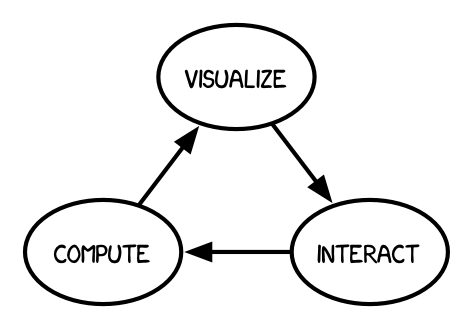

In [2]:
Image('images/VizInteractCompute.png')

## Image editing

In this example, we will perform some basic image processing using [scikit-image](http://scikit-image.org/).

In [3]:
from IPython.html.widgets import interact, fixed

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
import skimage
from skimage import data, filter, io

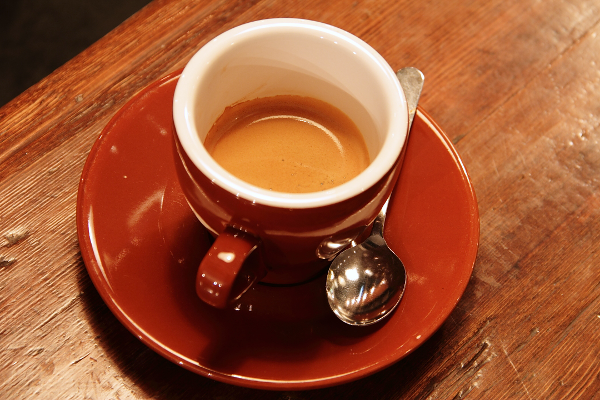

In [5]:
i = data.coffee()
io.Image(i)

Here is a function that can applies a Gaussian blur and adjusts the RGB channels:

In [6]:
def edit_image(image, sigma=0.1, r=1.0, g=1.0, b=1.0):
    new_image = filter.gaussian_filter(image, sigma=sigma, multichannel=True)
    new_image[:,:,0] = r*new_image[:,:,0]
    new_image[:,:,1] = g*new_image[:,:,1]
    new_image[:,:,2] = b*new_image[:,:,2]
    new_image = io.Image(new_image)
    display(new_image)
    return new_image

Calling the function once, displays and returns the edited image:

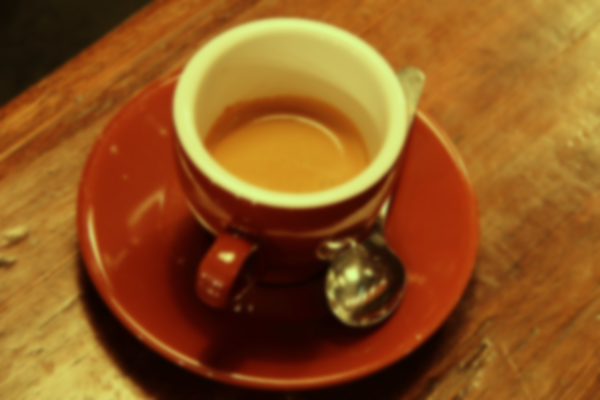

In [7]:
new_i = edit_image(i, 2.0, r=0.9, b=0.6);

We can use `interact` to explore the parameter space of the processed image:

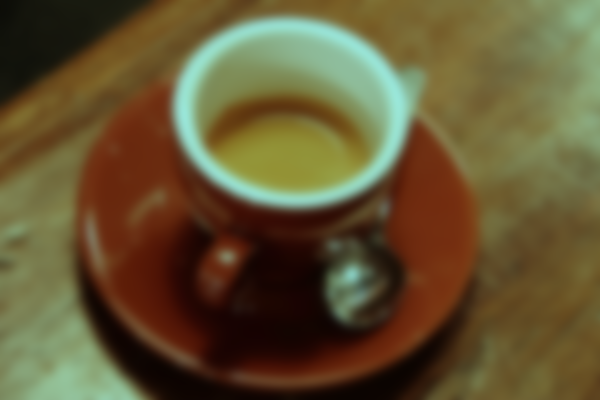

In [10]:
lims = (0.0,1.0,0.01)
interact(edit_image, image=fixed(i), sigma=(0.0,10.0,0.1), r=lims, g=lims, b=lims);

We can quickly interate through the visualize, interact, compute cycle.

## Symbolic mathematics

The `interact` function and the widget objects underneath it are completely generic and work with any type of Python code or output.

Here is an example from symbolic mathematics using the `sympy` library:

In [ ]:
from sympy import Symbol, Eq, factor, init_printing
init_printing(use_latex='mathjax')

In [ ]:
x = Symbol('x')

In [ ]:
def factorit(n):
    display(Eq(x**n-1, factor(x**n-1)))

In [ ]:
factorit(15)

In [ ]:
interact(factorit, n=(2,40));

## Statistics

Let's explore a 2d normal distribution:

$$
f_{\mathbf x}(x_1,\ldots,x_k) =
\frac{1}{\sqrt{(2\pi)^k|\boldsymbol\Sigma|}}
\exp\left(-\frac{1}{2}({\mathbf x}-{\boldsymbol\mu})^T{\boldsymbol\Sigma}^{-1}({\mathbf x}-{\boldsymbol\mu})
\right)
$$

$$
   \boldsymbol\mu = \begin{pmatrix} \mu_x \\ \mu_y \end{pmatrix}, \quad
    \boldsymbol\Sigma = \begin{pmatrix} \sigma_x^2 & \rho \sigma_x \sigma_y \\
                             \rho \sigma_x \sigma_y  & \sigma_y^2 \end{pmatrix}
$$

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [14]:
def normal_2d(n, mux, muy, sigmax, sigmay, corr):
    mean = [mux, muy]
    cov = [[sigmax**2, corr*sigmax*sigmay],[corr*sigmax*sigmay,sigmay**2]]
    d = np.random.multivariate_normal(mean, cov, n)
    return d[:,0], d[:,1]

In [15]:
x, y = normal_2d(100, 0.0, 0.0, 3.0, 2.0, 0.8)

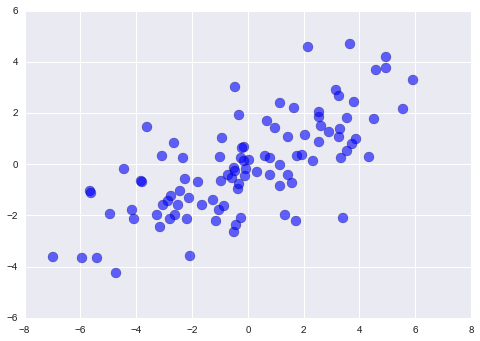

In [16]:
plt.scatter(x, y, s=100, alpha=0.6);

In [17]:
def plot_normal_2d(n, mux, muy, sigmax, sigmay, corr):
    x, y = normal_2d(n, mux, muy, sigmax, sigmay, corr)
    plt.scatter(x, y, s=100, alpha=0.6)
    plt.axis([-10.0,10.0,-10.0,10.0])

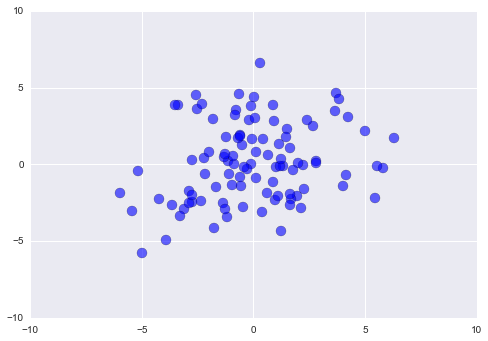

In [18]:
interact(plot_normal_2d, n=(10,100,10), mux=(-5.0,5.0,0.1), muy=(-5.0,5.0,0.1),
         sigmax=(0.01,5.0,0.01), sigmay=(0.01,5.0,0.01), corr=(-0.99,0.99,0.1));

## How does this work?

* The first argument to interact is a callable/function
* The keyword arguments to `interact` are "widget abbreviations"
* These "widget abbreviations" are converted to `Widget` instances
* These `Widget` objects are Python objects that are automatically synchronized with JavaScript MVC objects running in the browser
* `interact` simply calls its callable each time any widget changes state

In [19]:
def f(x):
    print x

In [20]:
interact(f, x=True);

True


In [21]:
interact(f, x=(0,10,2));

4


In [ ]:
interact(f, x='Hi!');

In [ ]:
interact(f, x=dict(this=list, that=tuple, other=str));